## 전처리(Preprocessing)

(1) 표준화(Standardization)
 : 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 
   값으로, 특정 범위를 벗어난 데이터는 outlier(이상치)로
   간주하여 제거한다
   
   StandardScaler 사용
   Z = (X - mean())/std()
 
(2) 정규화(Normalization) : 데이터의 범위를 일치시키거나
  분포를 유사하게 만들어 주는 기능
  데이터 범위를 0~1로 변환
   
   MinMaxSclaer사용
   Z = (X - min())/(max() - min())
   
### 데이터 분석 절차   
데이터 표준화를 통해 outlier를 제거하고, 
그 다음 데이터 정규화를 하여 상대적 크기의 영향력을 줄인 다음 분석을 시작한다

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# 표준화: StandardScaler

# (1) Numpy를 이용한 표준화 
# Z = (X - mean())/std()

data = np.random.randint(1000,size=(3,4))  # 0~11까지 정수
print('raw data:\n',data)
data_stand_np = (data - np.mean(data,axis=0))/np.std(data,axis=0)
print('numpy standardized data:\n',data_stand_np)

raw data:
 [[644 353 896 357]
 [259  56 358 995]
 [938 151 397 188]]
numpy standardized data:
 [[ 0.10910126  1.34307794  1.41122269 -0.44987021]
 [-1.2756455  -1.05508327 -0.78522227  1.38606068]
 [ 1.16654424 -0.28799467 -0.62600042 -0.93619047]]


In [25]:
# (2) scipy.stats를 이용한 표준화 : zscore()
import scipy.stats as ss
data_stand_ss = ss.zscore(data)
print('scipy standardized data:\n',data_stand_ss)

scipy standardized data:
 [[ 0.10910126  1.34307794  1.41122269 -0.44987021]
 [-1.2756455  -1.05508327 -0.78522227  1.38606068]
 [ 1.16654424 -0.28799467 -0.62600042 -0.93619047]]


In [26]:
# (3) sklearn.preprocessong 를 이용한 표준화
# StandardScaler().fit_transform()
from sklearn.preprocessing import StandardScaler
data_stand_skl = StandardScaler().fit_transform(data)
print('sklearn standardized data:\n',data_stand_skl)

sklearn standardized data:
 [[ 0.10910126  1.34307794  1.41122269 -0.44987021]
 [-1.2756455  -1.05508327 -0.78522227  1.38606068]
 [ 1.16654424 -0.28799467 -0.62600042 -0.93619047]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
# 정규화 : MinMaxSclaer, 범위는 0~1 
# (1) Numpy를 이용한 정규화 
# Z = (X - min())/(max() - min())
data_minmax_np = (data - np.min(data,axis=0))/ \
  (np.max(data,axis=0) - np.min(data,axis=0))
print('raw data:\n',data)
print('numpy minmax data:\n',data_minmax_np)

raw data:
 [[644 353 896 357]
 [259  56 358 995]
 [938 151 397 188]]
numpy minmax data:
 [[0.56701031 1.         1.         0.2094176 ]
 [0.         0.         0.         1.        ]
 [1.         0.31986532 0.07249071 0.        ]]


In [38]:
# (2) sklearn.preprocessing을 이용한 정규화
#  MinMaxScaler().fit_transform()
from sklearn.preprocessing import MinMaxScaler
data_minmax_skl = MinMaxScaler().fit_transform(data)
print('sklearn mimax data:\n',data_minmax_skl)

sklearn mimax data:
 [[0.56701031 1.         1.         0.2094176 ]
 [0.         0.         0.         1.        ]
 [1.         0.31986532 0.07249071 0.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


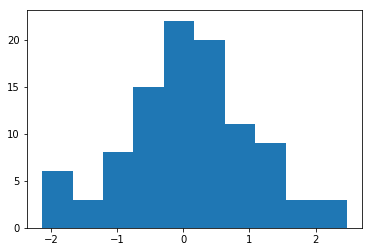

In [60]:
# 이상치(outlier)를 제거하여 표준화하기

np.random.seed(10)
data = np.random.randn(100) # 정규분포 ,데이터 100개
print('raw data:\n',data)
plt.hist(data)
plt.show()  # 정규성이 있다

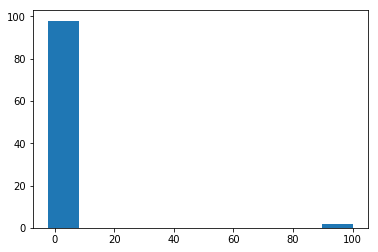

In [61]:
data[98:100] = 100  # 이상치 추가
print('insert outlier data:\n',data)
plt.hist(data)
plt.show()  # 정규성이 없다

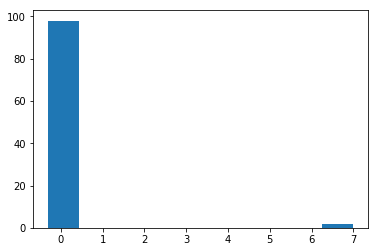

In [62]:
# numpy 사용
data_stand_np = (data - np.mean(data,axis=0))/ \
                 np.std(data,axis=0)
print('numpy standardized data:\n',data_stand_np)
# [..100 100] --> [...6.98416665  6.98416665]
plt.hist(data_stand_np)
plt.show()

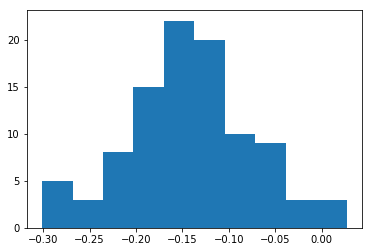

In [63]:
# zoom-in
data_stand_np_zoomin = data_stand_np[data_stand_np < 5 ] 
print('zoomin data:\n',data_stand_np_zoomin)
plt.hist(data_stand_np_zoomin)
plt.show()

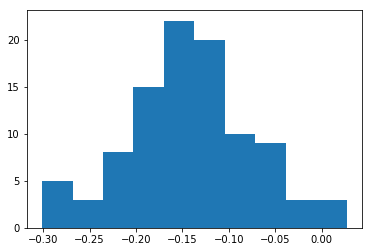

In [64]:
# scikit-learn 사용
data.shape  # (100,)
data = data.reshape(-1,1) # 1차원 배열을 2차원으로 변경
data.shape  # (100, 1)
data_stand_skl = StandardScaler().fit_transform(data)
# print(data_stand_skl)
data_stand_skl_zoomin = data_stand_skl[data_stand_skl < 5]
print('skl zoomin:\n',data_stand_skl_zoomin)
plt.hist(data_stand_skl_zoomin)
plt.show()